#Modulation 

##Or, It's (co)sines all the way down

In [2]:
%pylab inline
pylab.rcParams["figure.figsize"] = (10,5)

Populating the interactive namespace from numpy and matplotlib


Let's start with a simple sine wave.  You've probably seen these before: they're common in math and physics because they capture a lot of "magic" about circles, triangles, and other commonly-occurring phenomena (hereafter "stuff") in nature.  We'll get into those in time. For now, let's just play with them for a bit.

The first thing to know is that sine is a function that takes an angle and gives you a length.  Specifically, given an angle theta, sin(theta) is the length of the far side of a right triangle with hypotenuse of length one.  Got it?  Cool.

If not, here's an example.  In the plot below, there are a few triangles.  They all start at (0,0) (aka the origin, where the x-axis and y-axis meet), then angle up along a dashed line to a corner, then down a solid line back to the x-axis, and then back to the origin.  If you get out a protractor and measure the angles for each triangle, you'll find they match up with what's expected.

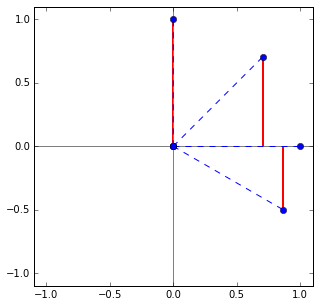

In [3]:
figure(figsize=(5,5)) # make our plot square

# The list of angles we're going to look at here
thetas_degrees = [ 0, -30, 45, 90 ]

for i,theta_deg in enumerate(thetas_degrees):
    theta_rad = theta_deg/180.0 * 3.14   # convert to radians
    x_i = math.cos(theta_rad)
    y_i = math.sin(theta_rad)
    
    # Draw the hypotenuse
    plot([0, x_i], [0, y_i], 'o--', color="blue") # x points, then y points, as separate lists. sorry.
    
    # Draw the "far" side from our angle
    vlines(x_i, 0, y_i, color="red", linewidth=2)
    
    # Tweak the plot: this is just here to make it look pretty.
    xlim(-1.1,1.1)
    ylim(-1.1,1.1)
    hlines(0, -2,2, color="grey")
    vlines(0, -2,2, color="grey")


Here's a basic sine wave:

(-1.1, 1.1)

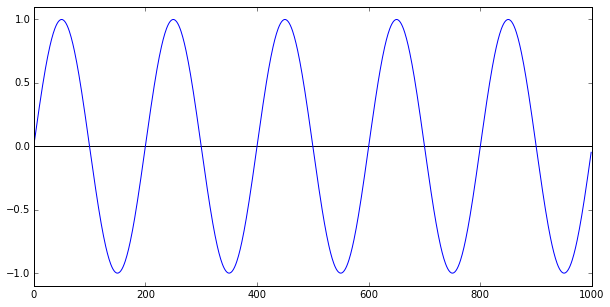

In [4]:
# Create a sine wave using naive python: we'll ease into using numpy.
yvals = []
for x in range(1000):
    theta = float(x)/200.0 * 2*3.14  # get the "angle" at this point in time
    yvals.append( 1.0 * math.sin(theta) )
    
hlines(0, 0,1000) # put down an x-axis line
plot(yvals)       # plot our sine wave
ylim(-1.1,1.1)    # give a bit of buffer above/below curve

Now, we can take that basic sine wave and change its *amplitude*: how big it is from top to bottom. 

(-2.1, 2.1)

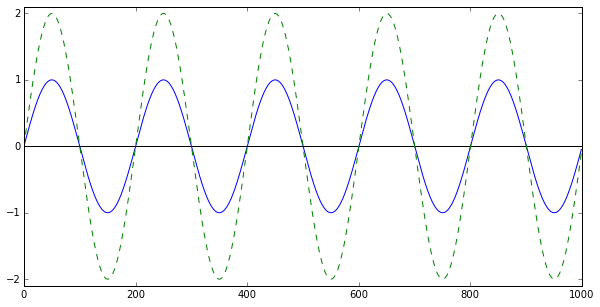

In [5]:
# Create a sine wave using naive python: we'll ease into using numpy.
yvals_amp = []
for x in range(1000):
    yvals_amp.append( 2.0 * math.sin(float(x)/200.0 * 2*3.14) )
    
hlines(0, 0,1000) # put down an x-axis line
plot(yvals)       # plot our sine wave
plot(yvals_amp, '--')   # plot our new sine wave
ylim(-2.1,2.1)    # give a bit of buffer above/below curve

By simply multiplying every value by a new amplitude, we change the amplitude of the whole wave.  Note that it still *in phase* with the old one, though: the *signal* is zero at the same places.  We've only changed how tall it gets in between those zeros.

We can change the *phase* of the overall signal as well, by adjusting the input to the sin() function:

(-1.1, 1.1)

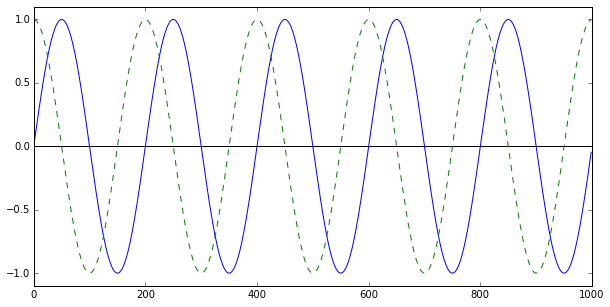

In [46]:
# Create a sine wave using naive python: we'll ease into using numpy.
yvals_phase = []
for x in range(1000):
    yvals_phase.append( 1.0 * math.sin(3.14/2 + float(x)/200.0 * 2*3.14) )
    
hlines(0, 0,1000) # put down an x-axis line
plot(yvals)       # plot our sine wave
plot(yvals_phase, '--') # plot our phase-shifted sine wave
ylim(-1.1,1.1)    # give a bit of buffer above/below curve

Note that changing the phase shifted the sine wave along the x-axis, that is, to the left or the right.  This is referred to as *phase shift*, which will come up again.

The last thing we can tweak is the frequency of the sine wave.  This requires changing how quickly the phase changes over time.  The phase shift above was a single value added to every entry, but we want to nudge the phase velocity around over time.  This is a bit more complicated.  We'll cycle back to this in a second.  First, let's look at modulating a real signal.

Here's our simple input signal.  We'll also use this opportunity to introduce numpy's vectorized math routines.  You give it a numpy.array object, and it works on all of them, much more quickly than python loops could.

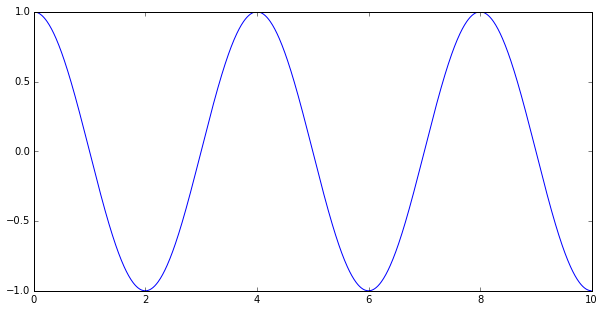

In [13]:
Fs = 100   # Sample frequency
t = np.arange(1000.0) / Fs  # time offsets: 1000 samples, taken at Fs.

signal = np.cos(t*2*np.pi * 0.25) # This is a 0.25Hz wave
plot(t, signal)

And let's give ourselves a carrier that's much higher-frequency than our signal:

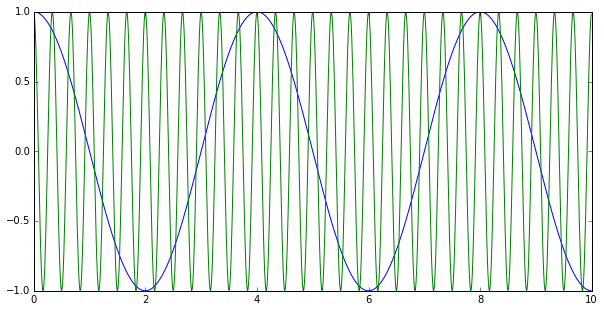

In [47]:
Fc = 3.0 # 3 Hz carrier
carrier = 1.0 * np.cos(t*2*np.pi * (Fc+0) + 0)

plot(t,signal)
plot(t, carrier)

First up: AM modulation.  We're going to have the signal be our amplitude:

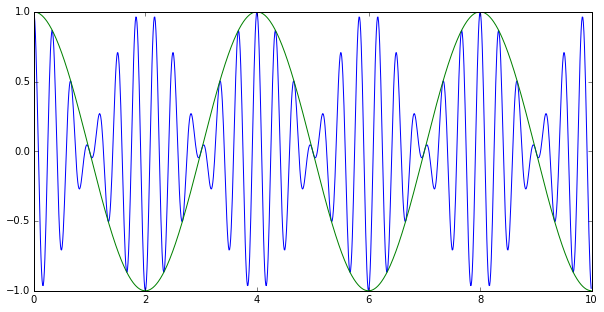

In [48]:
am_output = signal * np.cos(t*2*np.pi * (Fc+0) + 0)

plot(t, am_output)
plot(t, signal)

Next, let's look at phase modulation, where we move the signal around a bit:

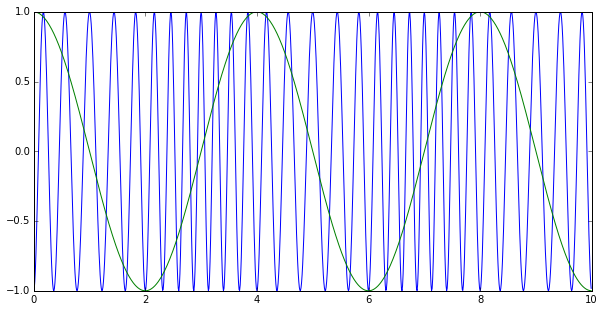

In [49]:
pm_scale = np.pi/1.0 # we have -pi to +pi as output values, let's use it

pm_output = 1.0 * np.cos(t*2*np.pi * (Fc+0) + (signal*pm_scale))
                         
plot(t, pm_output)
plot(t, signal)

And finally, we come to frequency modulation.  FM moves the carrier frequency around to convey our information.

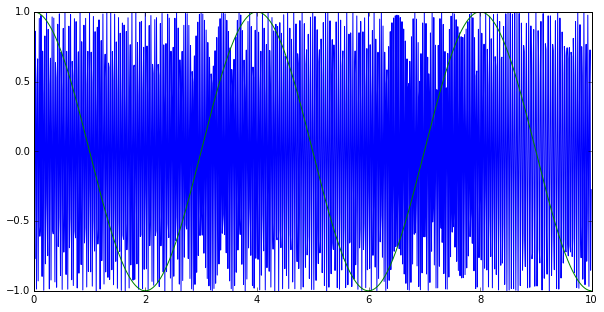

In [39]:
fm_scale = 0.5 / 1.0 # we'll use a 2Hz "deviation"

fm_output = 1.0 * np.cos(t*2*np.pi * (Fc+fm_scale*signal) + 0)
                         
plot(t, fm_output)
plot(t, signal)

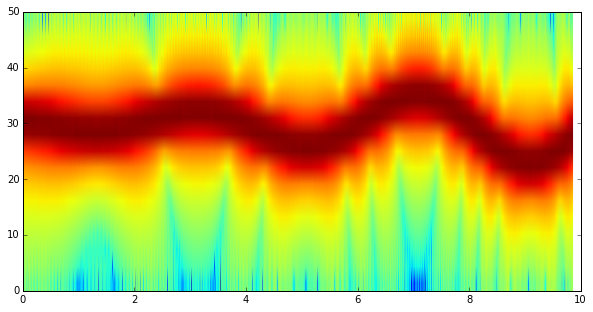

In [44]:
specgram(fm_output, Fs=Fs, NFFT=32, noverlap=31); None